In [1]:
import pyodbc
import pyodbc
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import ReadData

In [2]:
vital = pd.concat([ReadData.vital1, ReadData.vital2, ReadData.vital3], ignore_index=True)
vital_bz = vital[vital.bezeichnung.isin(['Blutzucker','Blutzucker mmol/l'])]
bz_klienten = list(vital_bz.klientid2.unique())
len(bz_klienten)
#1519 Patienten mit Blutzucker als Vitalparameter
len(vital.klientid2.unique())

185

In [3]:
anzahl_je_klient = vital_bz.klientid2.value_counts()
bz_klienten_with_data = list(anzahl_je_klient[anzahl_je_klient > 100].index)
len(bz_klienten_with_data)

#735 Patienten mit mindestens 100 Messungen

185

In [4]:
vital_bz2 = vital_bz[vital_bz.klientid2.isin(bz_klienten_with_data)]
anzahl = vital_bz2.klientid2.value_counts()

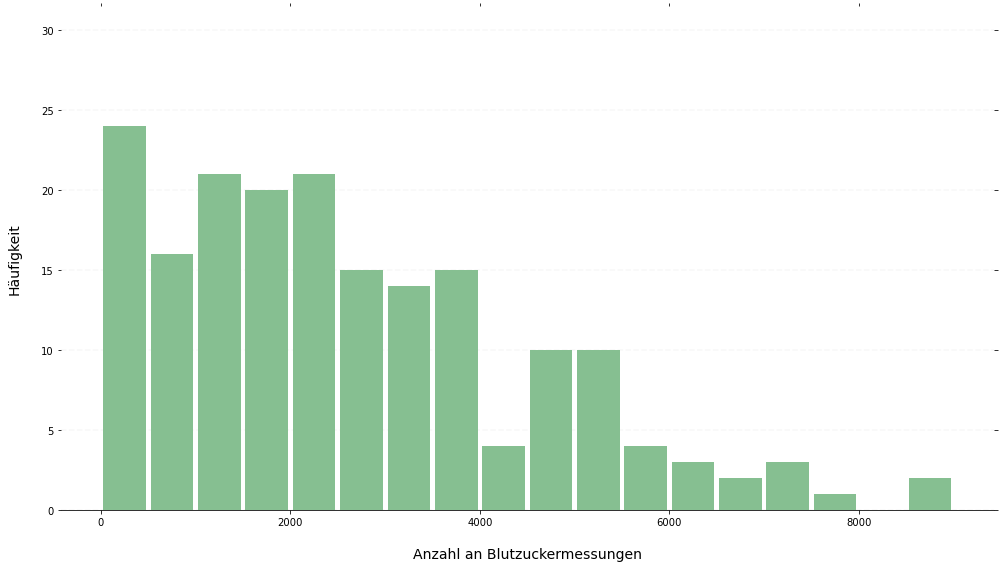

In [5]:
fig, ax = plt.subplots()
bins = np.linspace(0,9000,19)
ax = anzahl.hist(cumulative=False, bins = list(bins), color='#86bf91',
                 grid=False, figsize=(14,8), zorder=2, rwidth=0.9)
ax.set_ylabel('Häufigkeit',labelpad=20, size=14)
ax.set_xlabel("Anzahl an Blutzuckermessungen",labelpad=20, size=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
vals = ax.get_yticks()
for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
ax.tick_params(axis="both", which="both", bottom="off", top="off",
               labelbottom="off", left="off", right="off", labelleft="off")
fig.tight_layout()
fig.savefig("Verteilung_Blutzucker_Häufigkeit.pdf")



In [6]:
d = {}
for klient in bz_klienten_with_data:
    data = vital_bz2[vital_bz2.klientid2 == klient]
    delta = data.datum.max() - data.datum.min()
    f = len(data)
    d[klient] = [delta, f]

In [7]:
days = [x[0].days for x in d.values()]
counts = [x[1] for x in d.values()]
freq = [x[1]/x[0].days for x in d.values()] #Frequenz pro Trag

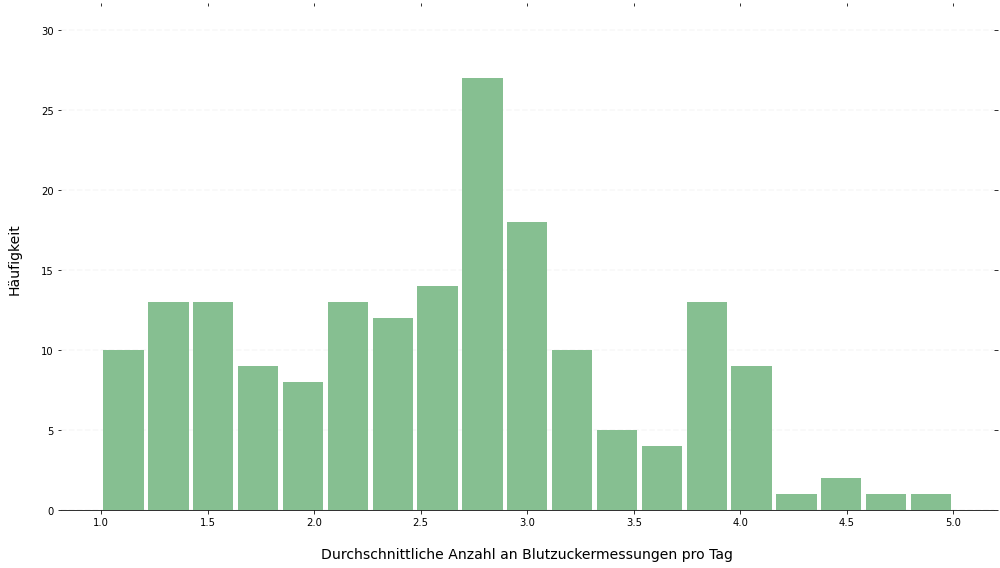

In [11]:
fig, ax = plt.subplots()
bins = np.linspace(1,5,20)
ax = pd.Series(freq).hist(cumulative=False, bins = list(bins), color='#86bf91',
                 grid=False, figsize=(14,8), zorder=2, rwidth=0.9)
ax.set_ylabel('Häufigkeit',labelpad=20, size=14)
ax.set_xlabel("Durchschnittliche Anzahl an Blutzuckermessungen pro Tag",labelpad=20, size=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
vals = ax.get_yticks()
for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
ax.tick_params(axis="both", which="both", bottom="off", top="off",
               labelbottom="off", left="off", right="off", labelleft="off")
fig.tight_layout()
fig.savefig("Verteilung_Blutzucker_Frequenz.pdf")

In [18]:
pd.Series(freq).quantile(q=0.93)

4.003905013192612

In [ ]:
fig, ax = plt.subplots()
bins = np.linspace(1,3000,30)
ax = pd.Series(days).hist(cumulative=False, bins = list(bins), color='#86bf91',
                 grid=False, figsize=(14,8), zorder=2, rwidth=0.9)
ax.set_ylabel('Häufigkeit',labelpad=20, size=14)
ax.set_xlabel("Dauer der Blutzuckermessungen in Tagen",labelpad=20, size=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
vals = ax.get_yticks()
for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
ax.tick_params(axis="both", which="both", bottom="off", top="off",
               labelbottom="off", left="off", right="off", labelleft="off")
fig.tight_layout()
fig.savefig("Verteilung_Blutzucker_Dauer.pdf")

In [10]:
pd.Series(days).describe()

count     185.000000
mean     1035.600000
std       689.730628
min        27.000000
25%       462.000000
50%       913.000000
75%      1418.000000
max      3133.000000
dtype: float64

In [ ]:
'''
Blutdruck
'''
vital_bd = vital[vital.bezeichnung == 'Blutdruck']
bd_klienten = list(vital_bd.klientid2.unique())
len(bd_klienten)
#1641 Patienten mit Blutdruck als Vitalparameter

In [73]:

anzahl_je_klient = vital_bd.klientid2.value_counts()
bd_klienten_with_data = list(anzahl_je_klient[anzahl_je_klient > 25].index)
len(bd_klienten_with_data)

#502 Patienten mit mindestens 25 Messungen

vital_bd2 = vital_bd[vital_bd.klientid2.isin(bd_klienten_with_data)]
anzahl = vital_bd2.klientid2.value_counts()

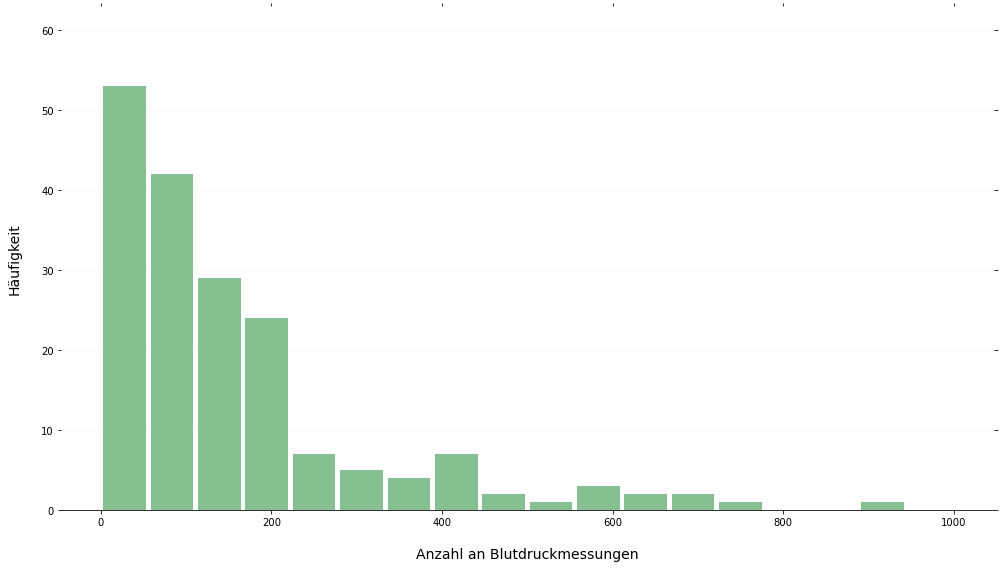

In [74]:
fig, ax = plt.subplots()
bins = np.linspace(0,1000,19)
ax = anzahl.hist(cumulative=False, bins = list(bins), color='#86bf91',
                 grid=False, figsize=(14,8), zorder=2, rwidth=0.9)
ax.set_ylabel('Häufigkeit',labelpad=20, size=14)
ax.set_xlabel("Anzahl an Blutdruckmessungen",labelpad=20, size=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
vals = ax.get_yticks()
for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
ax.tick_params(axis="both", which="both", bottom="off", top="off",
               labelbottom="off", left="off", right="off", labelleft="off")
fig.tight_layout()
fig.savefig("Verteilung_Blutdruck_Häufigkeit.pdf")


In [75]:
d = {}
for klient in bd_klienten_with_data:
    data = vital_bd2[vital_bd2.klientid2 == klient]
    delta = data.datum.max() - data.datum.min()
    f = len(data)
    d[klient] = [delta, f]

In [76]:
days = [x[0].days for x in d.values()]
counts = [x[1] for x in d.values()]
freq = [x[1]/x[0].days for x in d.values()] #Frequenz pro Trag

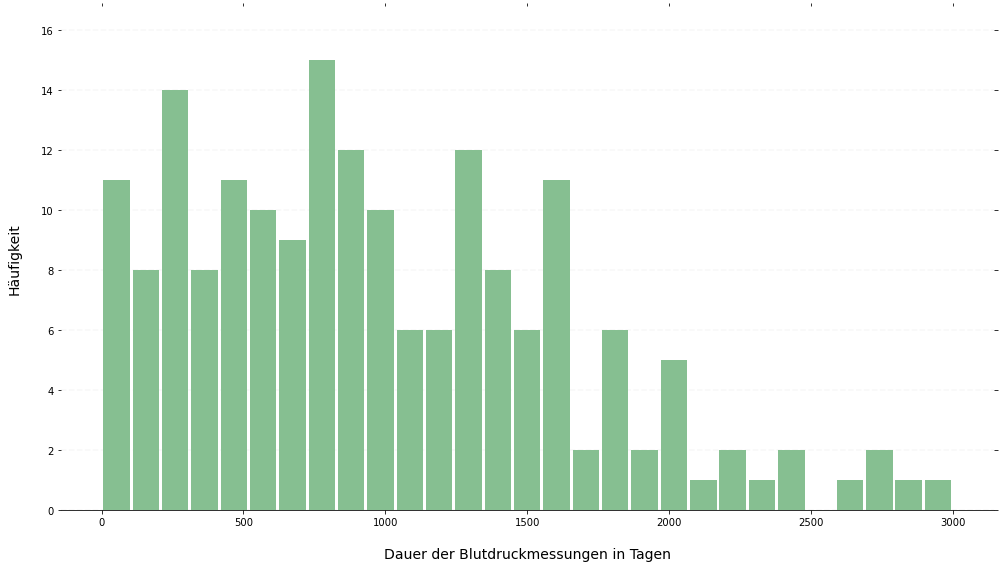

In [77]:
fig, ax = plt.subplots()
bins = np.linspace(1,3000,30)
ax = pd.Series(days).hist(cumulative=False, bins = list(bins), color='#86bf91',
                 grid=False, figsize=(14,8), zorder=2, rwidth=0.9)
ax.set_ylabel('Häufigkeit',labelpad=20, size=14)
ax.set_xlabel("Dauer der Blutdruckmessungen in Tagen",labelpad=20, size=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
vals = ax.get_yticks()
for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
ax.tick_params(axis="both", which="both", bottom="off", top="off",
               labelbottom="off", left="off", right="off", labelleft="off")
fig.tight_layout()
fig.savefig("Verteilung_Blutdruck_Dauer.pdf")

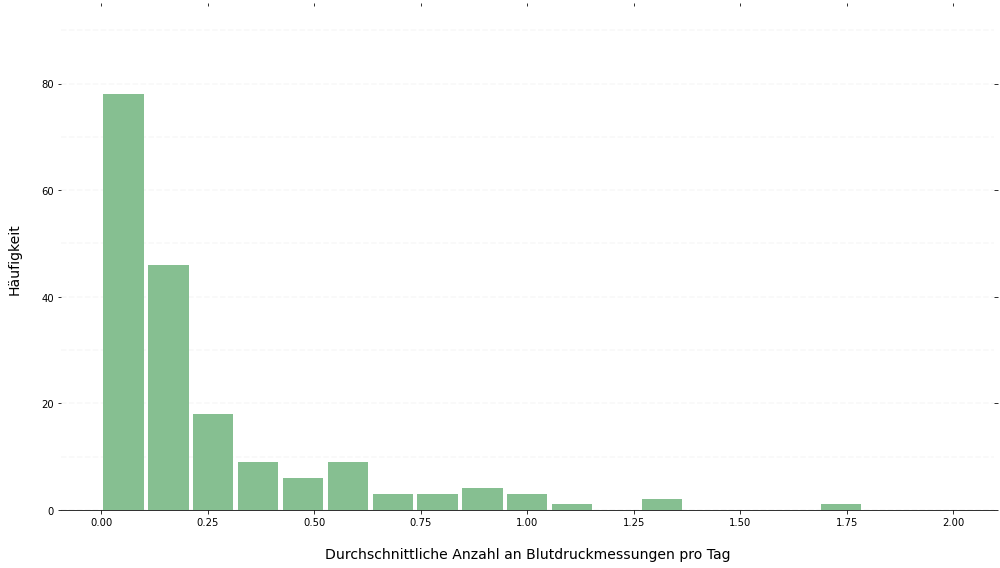

In [80]:
fig, ax = plt.subplots()
bins = np.linspace(0,2,20)
ax = pd.Series(freq).hist(cumulative=False, bins = list(bins), color='#86bf91',
                 grid=False, figsize=(14,8), zorder=2, rwidth=0.9)
ax.set_ylabel('Häufigkeit',labelpad=20, size=14)
ax.set_xlabel("Durchschnittliche Anzahl an Blutdruckmessungen pro Tag",labelpad=20, size=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
vals = ax.get_yticks()
for tick in vals:
    ax.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
ax.tick_params(axis="both", which="both", bottom="off", top="off",
               labelbottom="off", left="off", right="off", labelleft="off")
fig.tight_layout()
fig.savefig("Verteilung_Blutdruck_Frequenz.pdf")


In [19]:
'''
BMI
'''
vital_g = vital[vital.bezeichnung == 'BMI']
g_klienten = list(vital_g.klientid2.unique())
len(g_klienten)
#1641 Patienten mit Blutzucker als Vitalparameter
#len(bzbd_klienten_with_data.intersection(set(g_klienten)))
#alle Patienten bis auf einen, die sowohl Blutdurck
# als auch Blutzuckermessungen haben, haben auch ein BMI


1755

In [22]:
d = {}
for klient in g_klienten:
    data = vital_g[vital_g.klientid2 == klient]
    delta = data.datum.max() - data.datum.min()
    f = len(data)
    d[klient] = [delta, f]
d

{419701: [Timedelta('2173 days 20:59:00'), 122],
 392401: [Timedelta('3408 days 14:41:00'), 108],
 712501: [Timedelta('2028 days 16:52:00'), 135],
 593401: [Timedelta('3969 days 18:19:00'), 106],
 540701: [Timedelta('3674 days 08:18:00'), 116],
 300201: [Timedelta('0 days 00:00:00'), 1],
 178701: [Timedelta('2357 days 22:21:00'), 44],
 373401: [Timedelta('2454 days 18:02:00'), 77],
 550901: [Timedelta('4337 days 17:12:00'), 246],
 559601: [Timedelta('4663 days 01:09:00'), 138],
 674601: [Timedelta('3141 days 17:37:00'), 238],
 871101: [Timedelta('2670 days 01:17:00'), 95],
 739001: [Timedelta('1561 days 01:38:00'), 9],
 812701: [Timedelta('2110 days 10:22:00'), 66],
 318101: [Timedelta('2481 days 19:41:00'), 103],
 825401: [Timedelta('2364 days 01:55:00'), 116],
 827401: [Timedelta('1437 days 19:52:00'), 40],
 832701: [Timedelta('1415 days 23:58:00'), 96],
 681901: [Timedelta('1334 days 23:23:00'), 59],
 922801: [Timedelta('448 days 23:55:00'), 16],
 892201: [Timedelta('101 days 00:20:

In [23]:
days = [x[0].days for x in d.values()]
counts = [x[1] for x in d.values()]
freq = [x[1]/((x[0]).days+1) for x in d.values()] #Frequenz pro Trag
freq

[0.05611775528978841,
 0.0316808448225286,
 0.0665352390340069,
 0.026700251889168764,
 0.03156462585034014,
 1.0,
 0.018659881255301103,
 0.03136456211812627,
 0.056708160442600276,
 0.029588336192109776,
 0.07574793125397836,
 0.0355672032946462,
 0.005761843790012804,
 0.031264803410705824,
 0.041498791297340853,
 0.04904862579281184,
 0.027816411682892908,
 0.06779661016949153,
 0.044194756554307116,
 0.035634743875278395,
 0.08823529411764706,
 0.03780202650038971,
 0.12044244162228594,
 0.05228970444949659,
 0.21428571428571427,
 0.048982188295165395,
 0.03717472118959108,
 0.03366619115549215,
 0.036544850498338874,
 0.05723124516627997,
 0.005494505494505495,
 0.15168539325842698,
 0.07074569789674952,
 0.04081632653061224,
 0.042071197411003236,
 0.34838709677419355,
 0.030736240171551108,
 0.01363818692338548,
 0.4,
 0.03516068052930057,
 1.0,
 0.015463917525773196,
 0.03296703296703297,
 1.0,
 1.0,
 0.08791208791208792,
 0.0016806722689075631,
 0.005479452054794521,
 0.01476

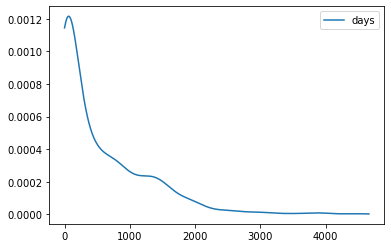

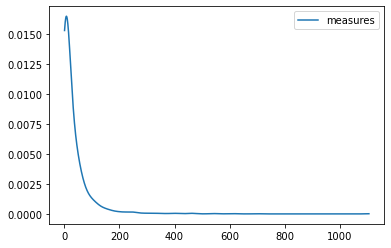

In [26]:
vital.bezeichnung.value_counts()
len(vital.klientid2.unique())

1891

In [27]:
len(bz_klienten_with_data), len(bd_klienten_with_data)


(735, 502)

In [28]:
'''
Patienten mit Blutdruck und Blutzucker Werten
'''
bzbd_klienten_with_data = set(bz_klienten_with_data).intersection(set(bd_klienten_with_data))
len(bzbd_klienten_with_data)
#325 Klienten mit Blutzucker und Blutdruck

325

In [29]:
#Blutdruck für Schnittmenge
d = {}
for klient in bzbd_klienten_with_data:
    data = vital_bd2[vital_bd2.klientid2 == klient]
    delta = data.datum.max() - data.datum.min()
    f = len(data)
    d[klient] = [delta, f]

In [30]:
days = [x[0].days for x in d.values()]
counts = [x[1] for x in d.values()]
freq = [x[1]/x[0].days for x in d.values()] #Frequenz pro Trag

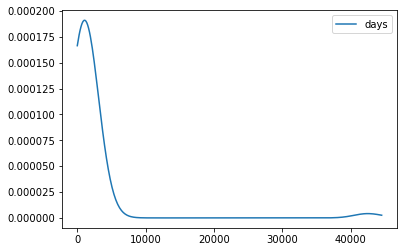

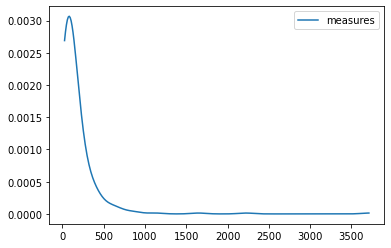

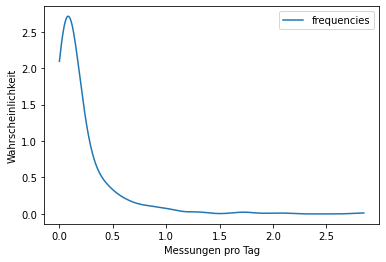

In [31]:
plt.figure()
series = np.array(days)
positions = np.linspace(series.min(),series.max(),len(series))
dichtefunktion = stats.gaussian_kde(series)

plt.plot(positions,dichtefunktion(positions), label="days")
plt.legend()
plt.show()
series = np.array(counts)
positions = np.linspace(series.min(),series.max(),len(series))
dichtefunktion = stats.gaussian_kde(series)

plt.plot(positions,dichtefunktion(positions), label="measures")

plt.legend()
plt.show()

plt.figure()
series = np.array(freq)
positions = np.linspace(series.min(),series.max(),len(series))
dichtefunktion = stats.gaussian_kde(series)

plt.plot(positions,dichtefunktion(positions), label="frequencies")
plt.xlabel("Messungen pro Tag")
plt.ylabel("Wahrscheinlichkeit")
plt.legend()
plt.show()

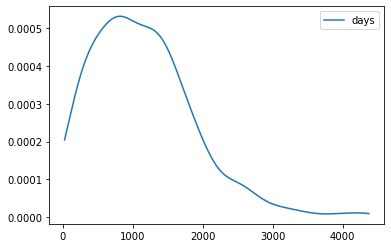

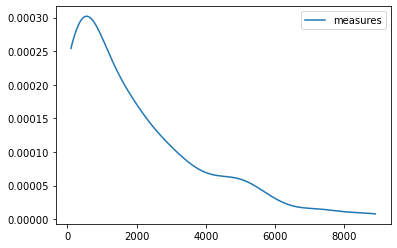

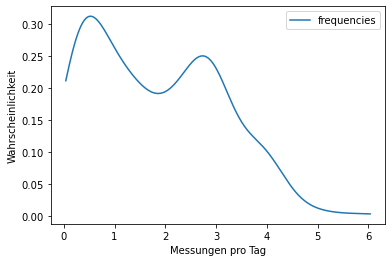

In [32]:
#Blutzucker für Schnittmenge
d = {}
for klient in bzbd_klienten_with_data:
    data = vital_bz2[vital_bz2.klientid2 == klient]
    delta = data.datum.max() - data.datum.min()
    f = len(data)
    d[klient] = [delta, f]

days = [x[0].days for x in d.values()]
counts = [x[1] for x in d.values()]
freq = [x[1]/x[0].days for x in d.values()] #Frequenz pro Trag


plt.figure()
series = np.array(days)
positions = np.linspace(series.min(),series.max(),len(series))
dichtefunktion = stats.gaussian_kde(series)

plt.plot(positions,dichtefunktion(positions), label="days")
plt.legend()
plt.show()
series = np.array(counts)
positions = np.linspace(series.min(),series.max(),len(series))
dichtefunktion = stats.gaussian_kde(series)

plt.plot(positions,dichtefunktion(positions), label="measures")

plt.legend()
plt.show()

plt.figure()
series = np.array(freq)
positions = np.linspace(series.min(),series.max(),len(series))
dichtefunktion = stats.gaussian_kde(series)

plt.plot(positions,dichtefunktion(positions), label="frequencies")
plt.xlabel("Messungen pro Tag")
plt.ylabel("Wahrscheinlichkeit")
plt.legend()
plt.show()

In [33]:
d = {}
for klient in bzbd_klienten_with_data:
    data_bd = vital_bd2[vital_bd2.klientid2 == klient]
    delta_bd = data_bd.datum.max() - data_bd.datum.min()
    f_bd = len(data_bd)

    data_bz = vital_bz2[vital_bz2.klientid2 == klient]
    delta_bz = data_bz.datum.max()-data_bz.datum.min()
    f_bz = len(data_bz)

    d[klient] = [delta_bd, f_bd, delta_bz, f_bz]
d

{4147202: [Timedelta('814 days 00:14:00'),
  34,
  Timedelta('880 days 11:30:00'),
  1121],
 618502: [Timedelta('1585 days 01:05:00'),
  27,
  Timedelta('1882 days 03:00:00'),
  478],
 2107402: [Timedelta('133 days 14:30:00'),
  139,
  Timedelta('133 days 14:30:00'),
  205],
 1599502: [Timedelta('1231 days 20:25:00'),
  61,
  Timedelta('1229 days 04:15:00'),
  4847],
 1962002: [Timedelta('1344 days 22:30:00'),
  198,
  Timedelta('1338 days 00:00:00'),
  3010],
 583702: [Timedelta('300 days 23:57:00'),
  85,
  Timedelta('308 days 10:00:00'),
  131],
 690203: [Timedelta('3066 days 06:30:00'),
  395,
  Timedelta('3089 days 12:59:00'),
  3888],
 2076702: [Timedelta('1464 days 15:15:00'),
  193,
  Timedelta('1469 days 19:39:00'),
  3064],
 1218602: [Timedelta('1043 days 00:00:00'),
  151,
  Timedelta('1050 days 04:00:00'),
  3297],
 1077301: [Timedelta('1835 days 17:59:00'),
  119,
  Timedelta('1881 days 12:30:00'),
  5058],
 577602: [Timedelta('1876 days 00:00:00'),
  74,
  Timedelta('1932

In [34]:
days_bd = [x[0].days for x in d.values()]
counts_bd = [x[1] for x in d.values()]
freq_bd = [x[1]/x[0].days for x in d.values()]

days_bz = [x[2].days for x in d.values()]
counts_bz = [x[3] for x in d.values()]
freq_bz = [x[3]/x[2].days for x in d.values()] #F

In [35]:
# in df each row shows the days and counts for one klient
df = pd.DataFrame(list(zip(bzbd_klienten_with_data, days_bd,
                           counts_bd, freq_bd,
                           days_bz, counts_bz, freq_bz)),
               columns =['klientid2', 'days_blutdruck', 'counts_blutdruck',
                         'frequenz_blutdruck', 'days_blutzucker', 'counts_blutzucker',
                         'frequenz_blutzucker'])

In [36]:
df

,klientid2,days_blutdruck,counts_blutdruck,frequenz_blutdruck,days_blutzucker,counts_blutzucker,frequenz_blutzucker
0,4147202,814,34,0.041769,880,1121,1.273864
1,618502,1585,27,0.017035,1882,478,0.253985
2,2107402,133,139,1.045113,133,205,1.541353
3,1599502,1231,61,0.049553,1229,4847,3.943857
4,1962002,1344,198,0.147321,1338,3010,2.249626
...,...,...,...,...,...,...,...
320,6012902,26,28,1.076923,27,163,6.037037
321,999401,2566,293,0.114186,2543,272,0.106960
322,593902,90,29,0.322222,97,379,3.907216
323,550901,4290,179,0.041725,2427,105,0.043263


<AxesSubplot:>

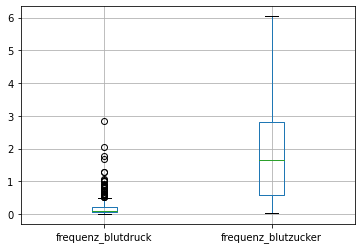

In [37]:
df.boxplot(column=['frequenz_blutdruck','frequenz_blutzucker'])

In [38]:
df.describe()

,klientid2,days_blutdruck,counts_blutdruck,frequenz_blutdruck,days_blutzucker,counts_blutzucker,frequenz_blutzucker
count,3.250000e+02,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,1.916138e+06,2035.421538,169.040000,0.208473,1144.920000,1938.086154,1.816508
std,1.442358e+06,6073.635820,289.321954,0.310176,738.102982,1915.547264,1.280346
min,2.700300e+04,26.000000,26.000000,0.000893,27.000000,102.000000,0.039086
25%,9.311020e+05,597.000000,46.000000,0.049106,600.000000,412.000000,0.580018
50%,1.474302e+06,1090.000000,85.000000,0.102362,1042.000000,1316.000000,1.655172
75%,2.589003e+06,1559.000000,194.000000,0.227139,1555.000000,2904.000000,2.825000
max,6.663502e+06,44497.000000,3712.000000,2.850998,4375.000000,8889.000000,6.037037


In [39]:
df[df.klientid2 == list(bzbd_klienten_with_data)[0]]

,klientid2,days_blutdruck,counts_blutdruck,frequenz_blutdruck,days_blutzucker,counts_blutzucker,frequenz_blutzucker
0,4147202,814,34,0.041769,880,1121,1.273864


<AxesSubplot:>

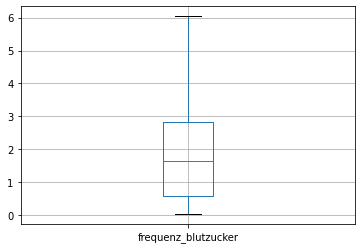

In [40]:
df.boxplot(column=['frequenz_blutzucker'])

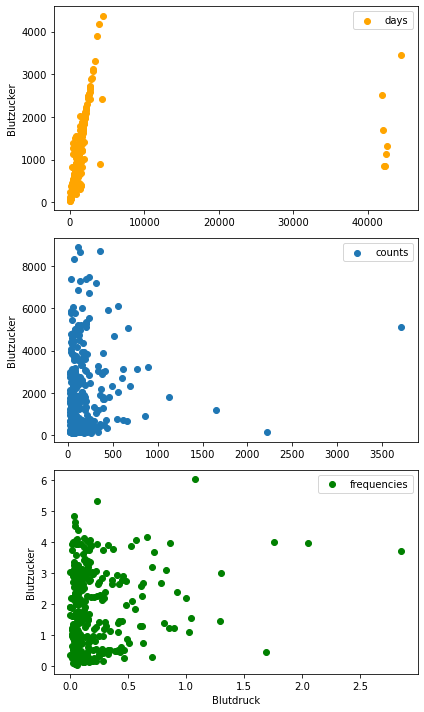

In [41]:
fig,axes = plt.subplots(3,1, figsize=(6,10))
#plt.scatter(df.counts_blutdruck, df.counts_blutzucker, label="counts")
axes[0].scatter(df.days_blutdruck, df.days_blutzucker, color = 'orange',label="days")
axes[0].set_ylabel("Blutzucker")

axes[0].legend()

axes[1].scatter(df.counts_blutdruck, df.counts_blutzucker, label="counts")
#plt.scatter(df.days_blutdruck, df.days_blutzucker, label="days")
axes[1].set_ylabel("Blutzucker")

axes[1].legend()

plt.scatter(df.frequenz_blutdruck, df.frequenz_blutzucker,color='green', label="frequencies")
#plt.scatter(df.days_blutdruck, df.days_blutzucker, label="days")
axes[2].set_xlabel("Blutdruck")
axes[2].set_ylabel("Blutzucker")
axes[2].legend()

fig.tight_layout()
fig.savefig('verteilungen.jpg')

In [42]:
vital_bz2

,id,klientid,datum,bezeichnung,wert,einheit,wurdeunterschritten,wurdeueberschritten,klientid2
0,954,4197,2011-04-26 07:45:00,Blutzucker,160,mg/dl,0,0,419701
1,955,4197,2011-04-26 11:15:00,Blutzucker,175,mg/dl,0,0,419701
2,956,4197,2011-04-26 17:15:00,Blutzucker,224,mg/dl,0,0,419701
3,957,4197,2011-04-27 07:45:00,Blutzucker,182,mg/dl,0,0,419701
4,958,4197,2011-04-27 11:15:00,Blutzucker,256,mg/dl,0,0,419701
...,...,...,...,...,...,...,...,...,...
1474824,1972440,13978,2017-05-06 18:00:00,Blutzucker,188,mg/dl,0,1,1397803
1474825,1972441,13978,2017-05-07 06:30:00,Blutzucker,206,mg/dl,0,1,1397803
1474826,1972442,13978,2017-05-07 18:00:00,Blutzucker,199,mg/dl,0,1,1397803
1474827,1972443,13978,2017-05-08 06:30:00,Blutzucker,195,mg/dl,0,1,1397803


In [43]:
date_dict = {}
for klient in bzbd_klienten_with_data:
    data = vital_bz2[vital_bz2.klientid2 == klient].datum
    date_dict[klient] = data


In [44]:
klient = list(bzbd_klienten_with_data)[40]
mylist = list(set((vital_bd2[vital_bd2.klientid2 == klient].datum.dt.date)))
mylist = sorted(mylist)
mylist

[datetime.date(2020, 3, 23),
 datetime.date(2020, 5, 4),
 datetime.date(2020, 6, 22),
 datetime.date(2020, 7, 4),
 datetime.date(2020, 7, 5),
 datetime.date(2020, 7, 6),
 datetime.date(2020, 7, 7),
 datetime.date(2020, 7, 8),
 datetime.date(2020, 7, 9),
 datetime.date(2020, 7, 10),
 datetime.date(2020, 7, 11),
 datetime.date(2020, 7, 12),
 datetime.date(2020, 7, 13),
 datetime.date(2020, 7, 14),
 datetime.date(2020, 7, 15),
 datetime.date(2020, 7, 16),
 datetime.date(2020, 7, 17),
 datetime.date(2020, 7, 18),
 datetime.date(2020, 7, 19),
 datetime.date(2020, 7, 20),
 datetime.date(2020, 7, 21),
 datetime.date(2020, 7, 22),
 datetime.date(2020, 7, 23),
 datetime.date(2020, 7, 24),
 datetime.date(2020, 7, 25),
 datetime.date(2020, 7, 26),
 datetime.date(2020, 7, 27),
 datetime.date(2020, 7, 28),
 datetime.date(2020, 7, 29),
 datetime.date(2020, 7, 30),
 datetime.date(2020, 7, 31),
 datetime.date(2020, 8, 1),
 datetime.date(2020, 8, 2),
 datetime.date(2020, 8, 3),
 datetime.date(2020, 8, 

In [45]:
# df_everyday has all the rows of df (days&counts per klient) where the
# frequency of blutzucker is bigger than or equal to 1
# that means in average a daily measurement of blutzucker
df_everyday = df[(df.frequenz_blutzucker >= 1) & (df.counts_blutzucker >= 100)]
klienten_everyday = list(df_everyday.klientid2.unique())

In [46]:
df[df.klientid2.isin(klienten_everyday)].describe()

,klientid2,days_blutdruck,counts_blutdruck,frequenz_blutdruck,days_blutzucker,counts_blutzucker,frequenz_blutzucker
count,2.080000e+02,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,2.018753e+06,2079.528846,168.865385,0.238630,1099.649038,2726.552885,2.578312
std,1.477254e+06,6380.550437,298.856906,0.354567,739.129307,1970.296951,0.951321
min,2.700300e+04,26.000000,26.000000,0.000893,27.000000,127.000000,1.016308
25%,9.815512e+05,531.750000,42.000000,0.051508,566.000000,1223.000000,1.802200
50%,1.608952e+06,979.500000,91.000000,0.113688,973.000000,2312.500000,2.662903
75%,2.631402e+06,1555.250000,193.250000,0.259857,1508.750000,3852.750000,3.103397
max,6.663502e+06,42644.000000,3712.000000,2.850998,4186.000000,8889.000000,6.037037


In [51]:
#df_everyday2 combines daily meausrements of blutzucker with an at least
#monthly measurement of blutdruck
df_everyday2 = df_everyday[df_everyday.frequenz_blutdruck >= 1/30]
myfinalklients = list(df_everyday2.klientid2.unique())
myfinaldf = vital[vital.klientid2.isin(myfinalklients)]
myfinaldf["wert"] = [x.replace(",",".") for x in myfinaldf.wert]



textfile = open("patientenliste.txt", "w")
for element in myfinalklients:
    textfile.write(str(element))
    textfile.write("\n")
textfile.close()

<ipython-input-51-9c959429bf17>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myfinaldf["wert"] = [x.replace(",",".") for x in myfinaldf.wert]


<ipython-input-48-18484c7bb02d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_bz["wert"] = num
<ipython-input-48-18484c7bb02d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_bz.sort_values(by='datum',inplace=True)
<ipython-input-48-18484c7bb02d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_bd["sys"] = sys

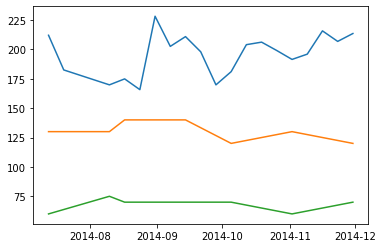

In [48]:


my = myfinaldf[myfinaldf.klientid2 == myfinalklients[20]]
my_bz = my[my.bezeichnung.isin(["Blutzucker", "Blutzucker mmol/l"])]

num = pd.to_numeric(my_bz.wert,errors='coerce')
my_bz["wert"] = num

my_bz.sort_values(by='datum',inplace=True)
my_bz.wert.describe()

my_bz_time = my_bz[["datum","wert"]]
df_time = my_bz_time.set_index("datum")
df_time_d = df_time.resample('1w').mean()

my_bd = my[my.bezeichnung.isin(["Blutdruck"])]


werte = list(my_bd.wert.apply(str))
sys = [float(x.split("/")[0]) if len(x)>1 else np.NaN for x in werte]
dia = [float(x.split("/")[1]) if len(x)>1 else np.NaN for x in werte]
my_bd["sys"] = sys
my_bd["dia"] = dia
my_bd.sort_values(by='datum',inplace=True)
my_bd.sys.describe()

my_bd_time = my_bd[["datum","sys", "dia"]]
df_time2 = my_bd_time.set_index("datum")
df_time2_d = df_time2.resample('1w').mean()

sys = df_time2_d.sys.interpolate(method = 'linear')
dia = df_time2_d.dia.interpolate(method = 'linear')
bz = df_time_d.wert.interpolate(method = 'linear')

start_date = max(df_time_d.index.min(), df_time2_d.index.min())
end_date = start_date + timedelta(days=150)
shift = timedelta(days=30)

plt.plot(bz[start_date+shift:end_date+shift])
plt.plot(sys[start_date+shift:end_date+shift])
plt.plot(dia[start_date+shift:end_date+shift])

